In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
happy = pd.read_csv('/content/2019.csv')

In [3]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
happy.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
print(happy.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [8]:
continent_map = {
    "Norway": "Europe", "Denmark": "Europe", "Switzerland": "Europe",
    "Iceland": "Europe", "Finland": "Europe", "Canada": "North America",
    "United States": "North America", "Mexico": "North America",
    "India": "Asia", "Japan": "Asia", "China": "Asia",
    "Australia": "Oceania"
}

happy['Continent'] = happy['Country or region'].map(continent_map)
happy['Continent'].fillna('Other', inplace=True)

In [9]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Other


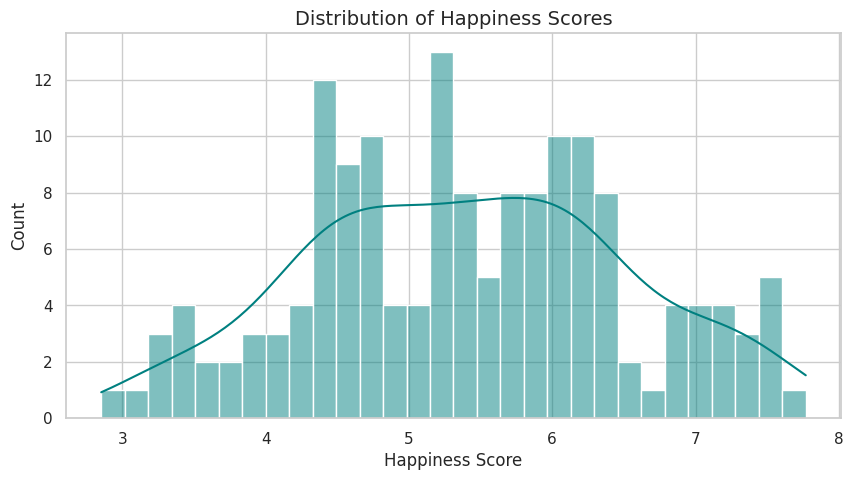

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(happy['Score'], bins=30, kde=True, color='teal')
plt.title('Distribution of Happiness Scores', fontsize=14)
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.show()

most countries have moderate to high happiness

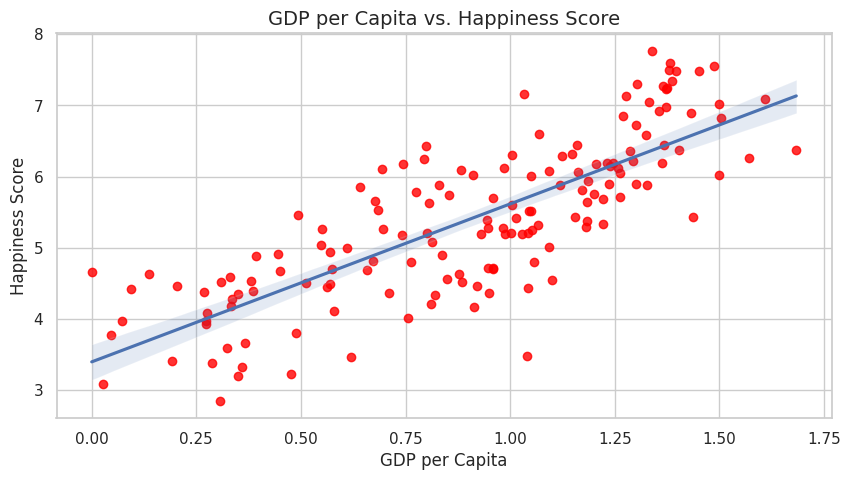

In [20]:
plt.figure(figsize=(10,5))
sns.regplot(x=happy['GDP per capita'], y=happy['Score'], scatter_kws={'color':'red'})
plt.title('GDP per Capita vs. Happiness Score', fontsize=14)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

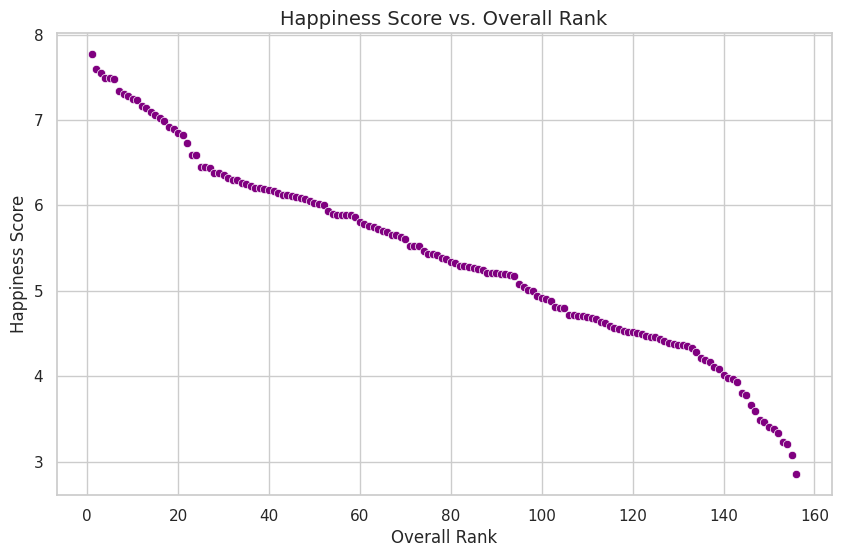

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=happy['Overall rank'], y=happy['Score'],color='purple')
plt.title('Happiness Score vs. Overall Rank', fontsize=14)
plt.xlabel('Overall Rank')
plt.ylabel('Happiness Score')
plt.show()

Higher GDP generally leads to higher happiness

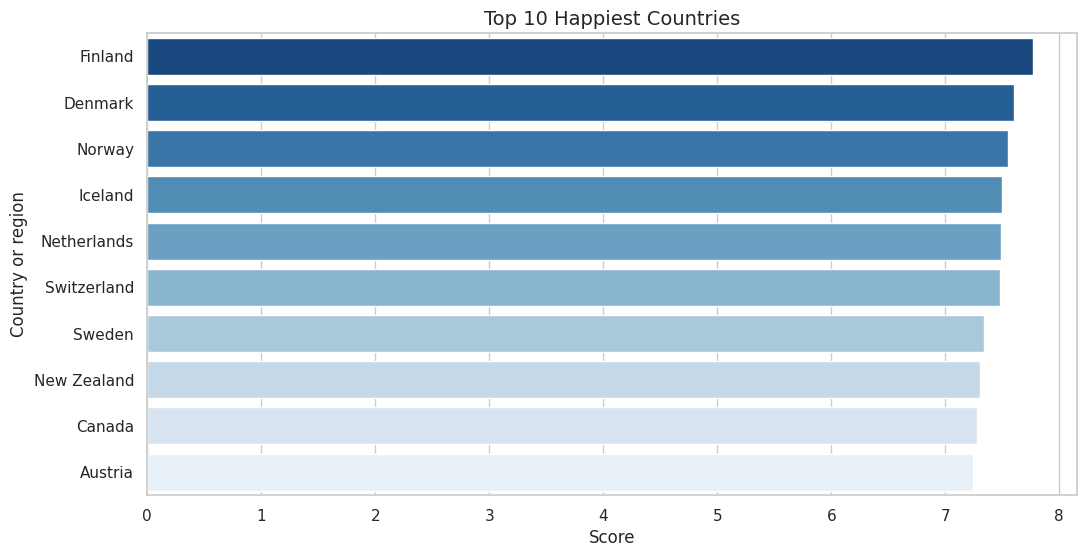

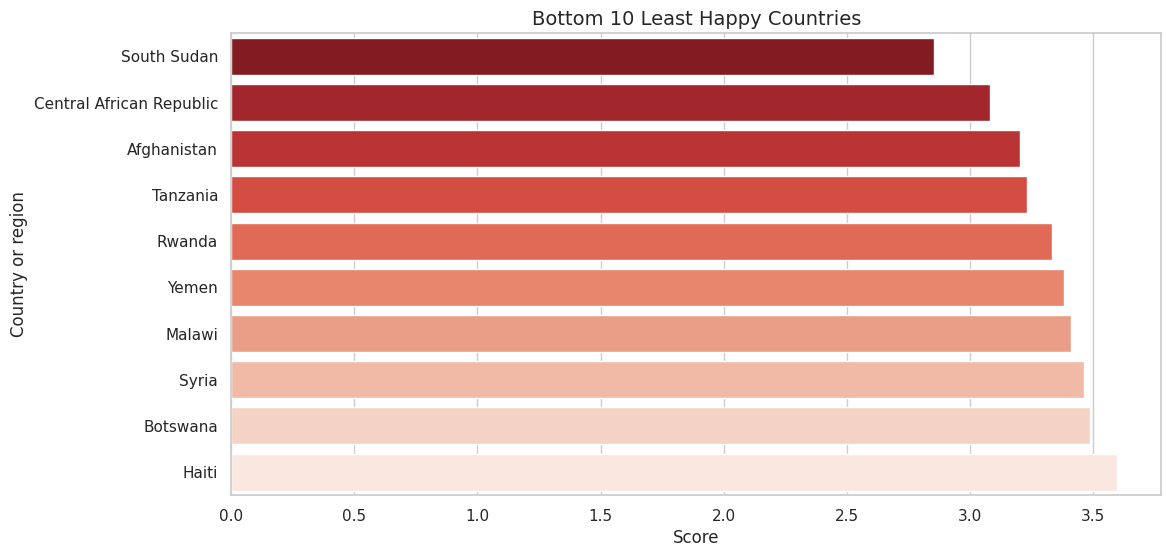

In [19]:
top10 = happy.nlargest(10, 'Score')
bottom10 = happy.nsmallest(10, 'Score')

plt.figure(figsize=(12,6))
sns.barplot(y='Country or region', x='Score', data=top10, palette='Blues_r')
plt.title('Top 10 Happiest Countries', fontsize=14)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(y='Country or region', x='Score', data=bottom10, palette='Reds_r')
plt.title('Bottom 10 Least Happy Countries', fontsize=14)
plt.show()

In [17]:
happy.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Other
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Other
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Other
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Other


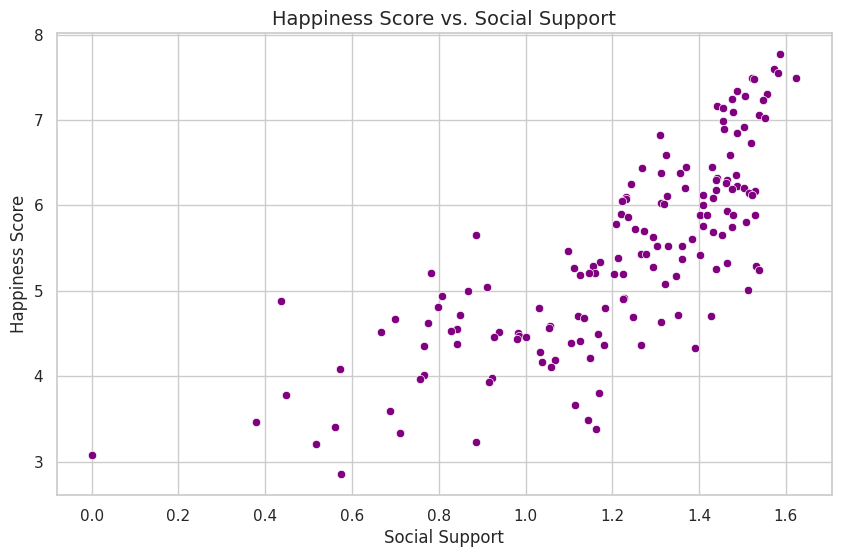

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=happy['Social support'], y=happy['Score'],color='purple')
plt.title('Happiness Score vs. Social Support', fontsize=14)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()


Text(0.5, 0, 'Healthy Life Expectancy')

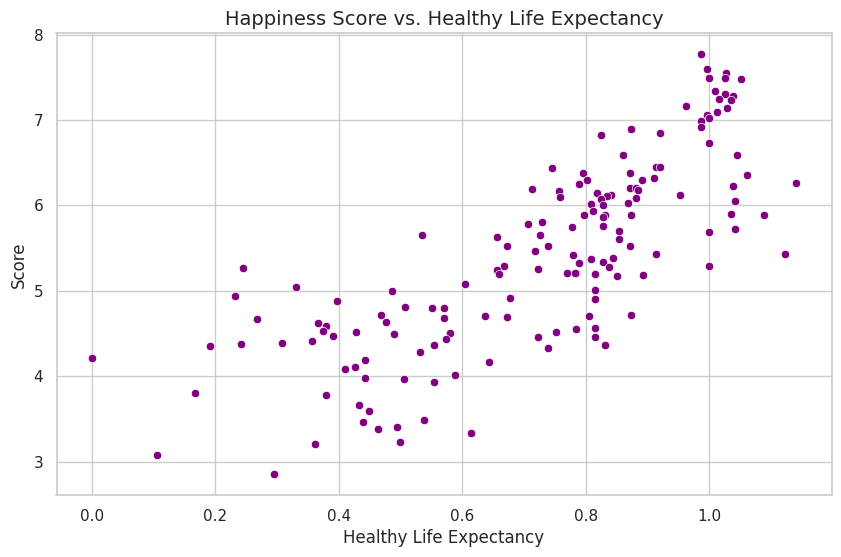

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=happy['Healthy life expectancy'], y=happy['Score'],color='purple')
plt.title('Happiness Score vs. Healthy Life Expectancy', fontsize=14)
plt.xlabel('Healthy Life Expectancy')

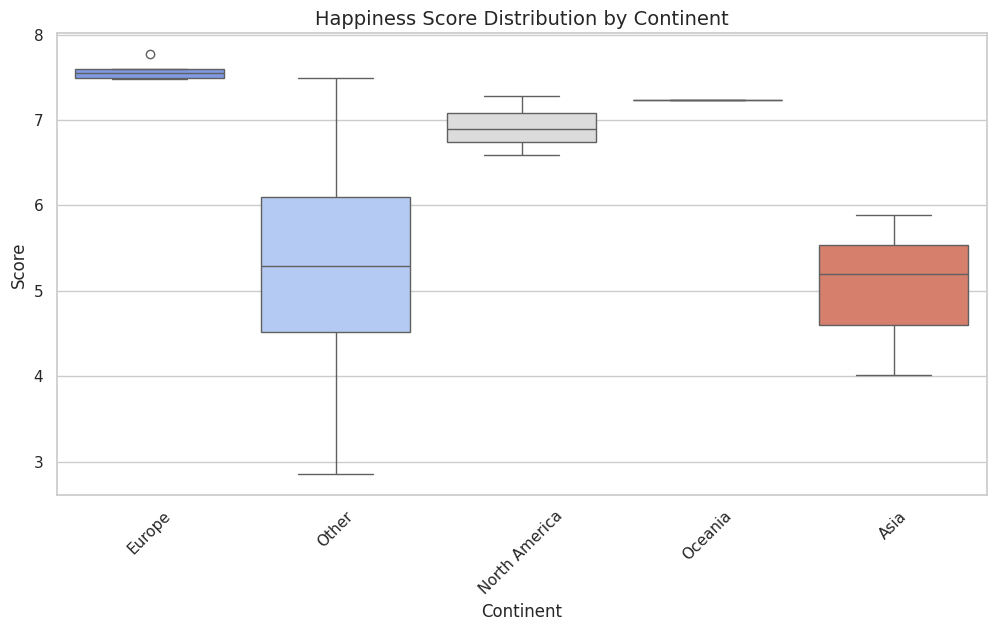

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Continent', y='Score', data=happy, palette='coolwarm')
plt.title('Happiness Score Distribution by Continent', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Europe and North America have the highest happiness scores.

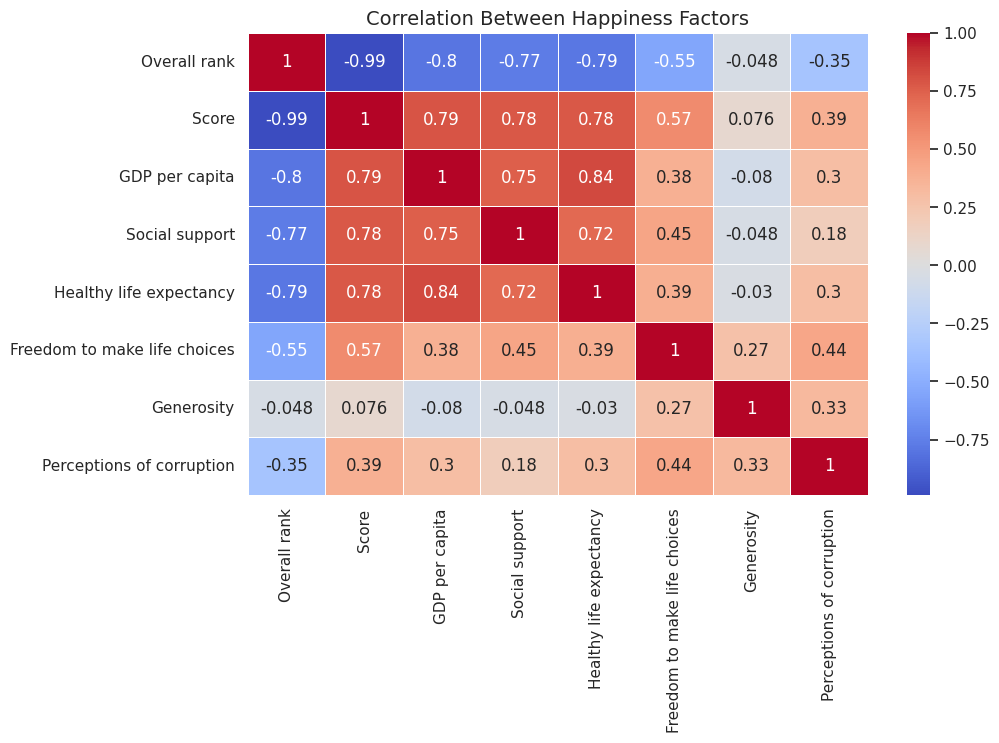

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(happy.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Happiness Factors', fontsize=14)
plt.show()

Happiness Score is most strongly correlated with:
1. GDP per capita (Ecnomic influence)
2. Social Support (Community well-being)
3. Healthy life expectancy

In [30]:
happy.to_csv('world_happiness_cleaned.csv', index=False)